# Data Import and Visualisations

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading data
Raw_data = pd.read_csv('data.csv')
ID_num = Raw_data.iloc[:, 0]
data = Raw_data.iloc[:,1:]

# check for missing values
missing_values = data.isnull().sum()
print(f"The number of missing values in each column is: \n{missing_values}")

    

## distribution and mean, median variances,  here!!
## box and whisker plot
## identify potential outliers that are more than 3 standard deviations
## chi2 fit to guassian profiles

    
    

The number of missing values in each column is: 
in_0    0
in_1    0
in_2    0
in_3    0
in_4    0
in_5    0
in_6    0
in_7    0
dtype: int64


# Exploratory data analysis

In [3]:
means = data.mean(axis=0)
median = data.median()

#standard deviations
stds = data.std(axis=0)


print("Means:")
print(means)
print("\nMedian:")
print(median)
print("\nStandard deviations:")
print(stds)

# rnagesss and interquartle range
##### summmarise - present in a tableeeeeeeee

Means:
in_0    5.780207e-12
in_1    8.670458e-12
in_2   -5.780309e-12
in_3   -5.780281e-12
in_4   -2.023116e-11
in_5    2.890161e-12
in_6   -5.780574e-12
in_7   -5.780301e-12
dtype: float64

Median:
in_0    0.026942
in_1   -0.017408
in_2   -0.000123
in_3   -0.007455
in_4    0.068352
in_5    0.135757
in_6    0.063324
in_7    0.095344
dtype: float64

Standard deviations:
in_0    1.001448
in_1    1.001448
in_2    1.001448
in_3    1.001448
in_4    1.001448
in_5    1.001448
in_6    1.001448
in_7    1.001448
dtype: float64


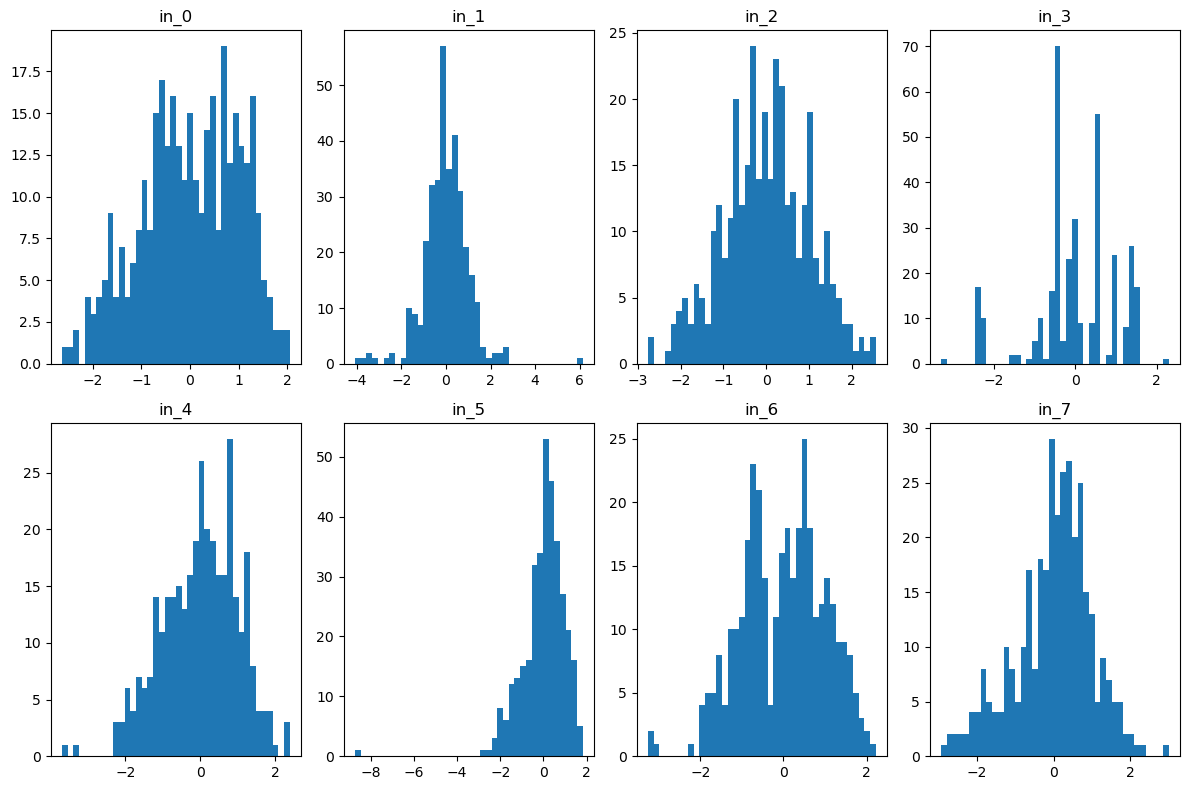

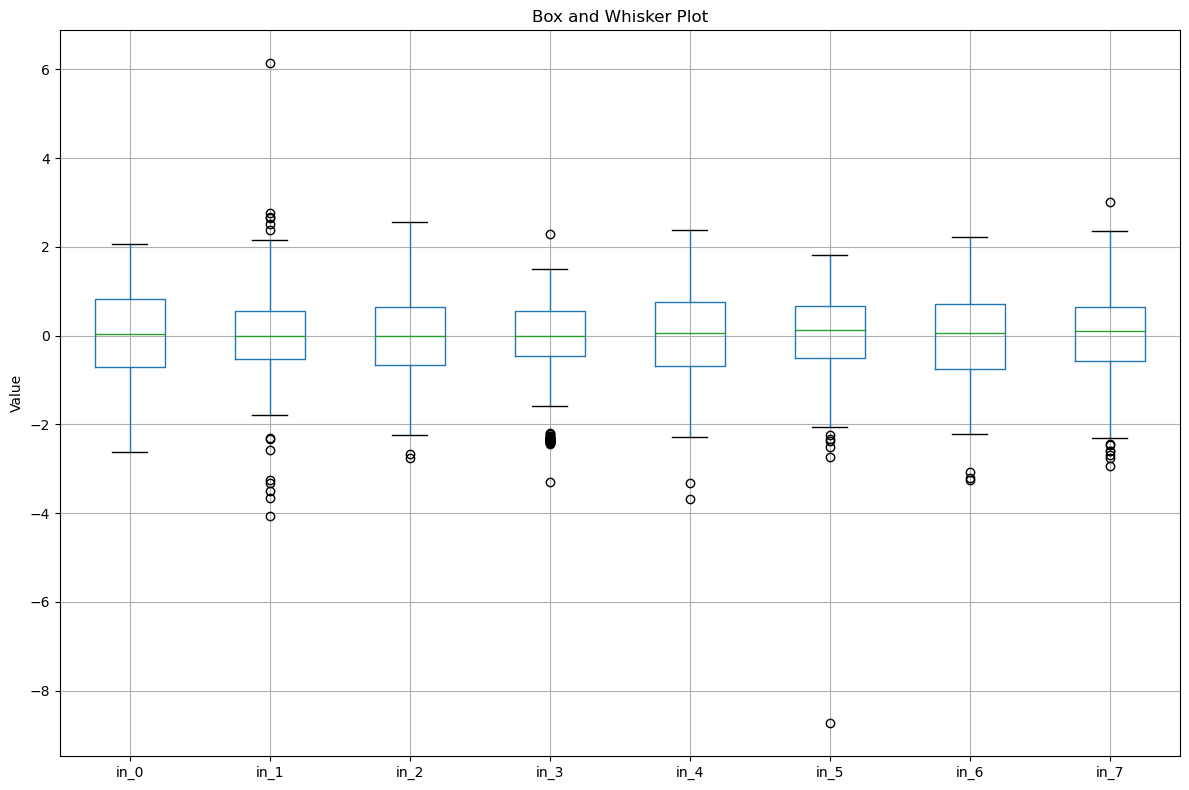

In [4]:
### Distributions
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 8))

axes = axes.flatten()

# Iterate over each column and plot a histogram
for i, col in enumerate(data.columns):
    axes[i].hist(data[col], bins=40)  
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

data.boxplot(figsize=(12, 8))

# Set the title and y-axis label
plt.title('Box and Whisker Plot')
plt.ylabel('Value')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

#Calculate the lower whisker by finding the minimum value within the dataset that is not considered an outlier. This value is determined using the formula: Q1 - 1.5 * IQR. Any data point below this value is considered a lower outlier.

In [5]:
#check normality ?shapiro wilk
from scipy import stats
for col in data.columns:
    shapiro_test = stats.shapiro(data[col])
    shapiro_test
    shapiro_test.statistic

    print(shapiro_test.pvalue)
    

0.0001249196648132056
8.697029207915818e-11
0.7800683975219727
1.2714915925693404e-11
0.008060199208557606
5.882905869499173e-16
0.0016672903439030051
0.00010350145021220669


# Correlation Matrix

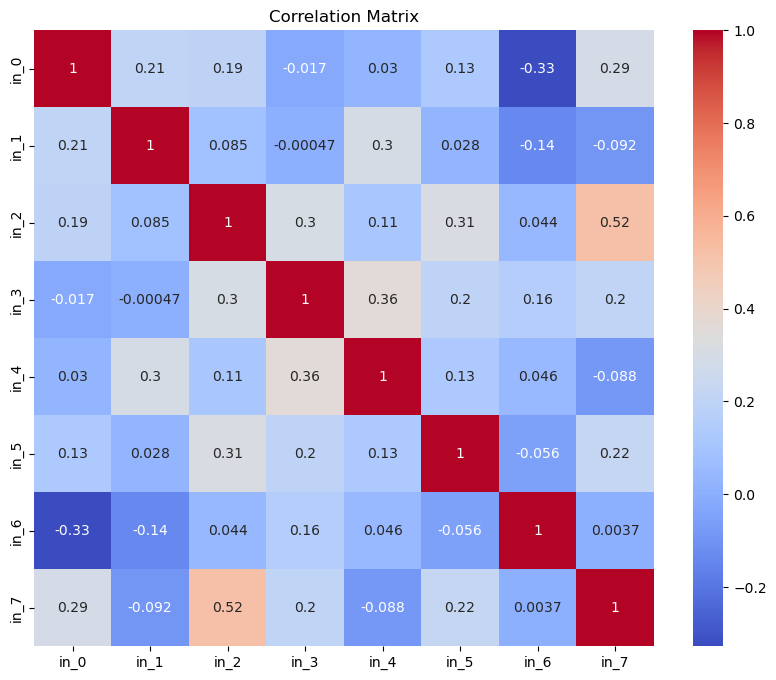

In [6]:
import seaborn as sns

correlation_matrix = data.corr(method='kendall')

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Visualisation of paired variables with strong correlation

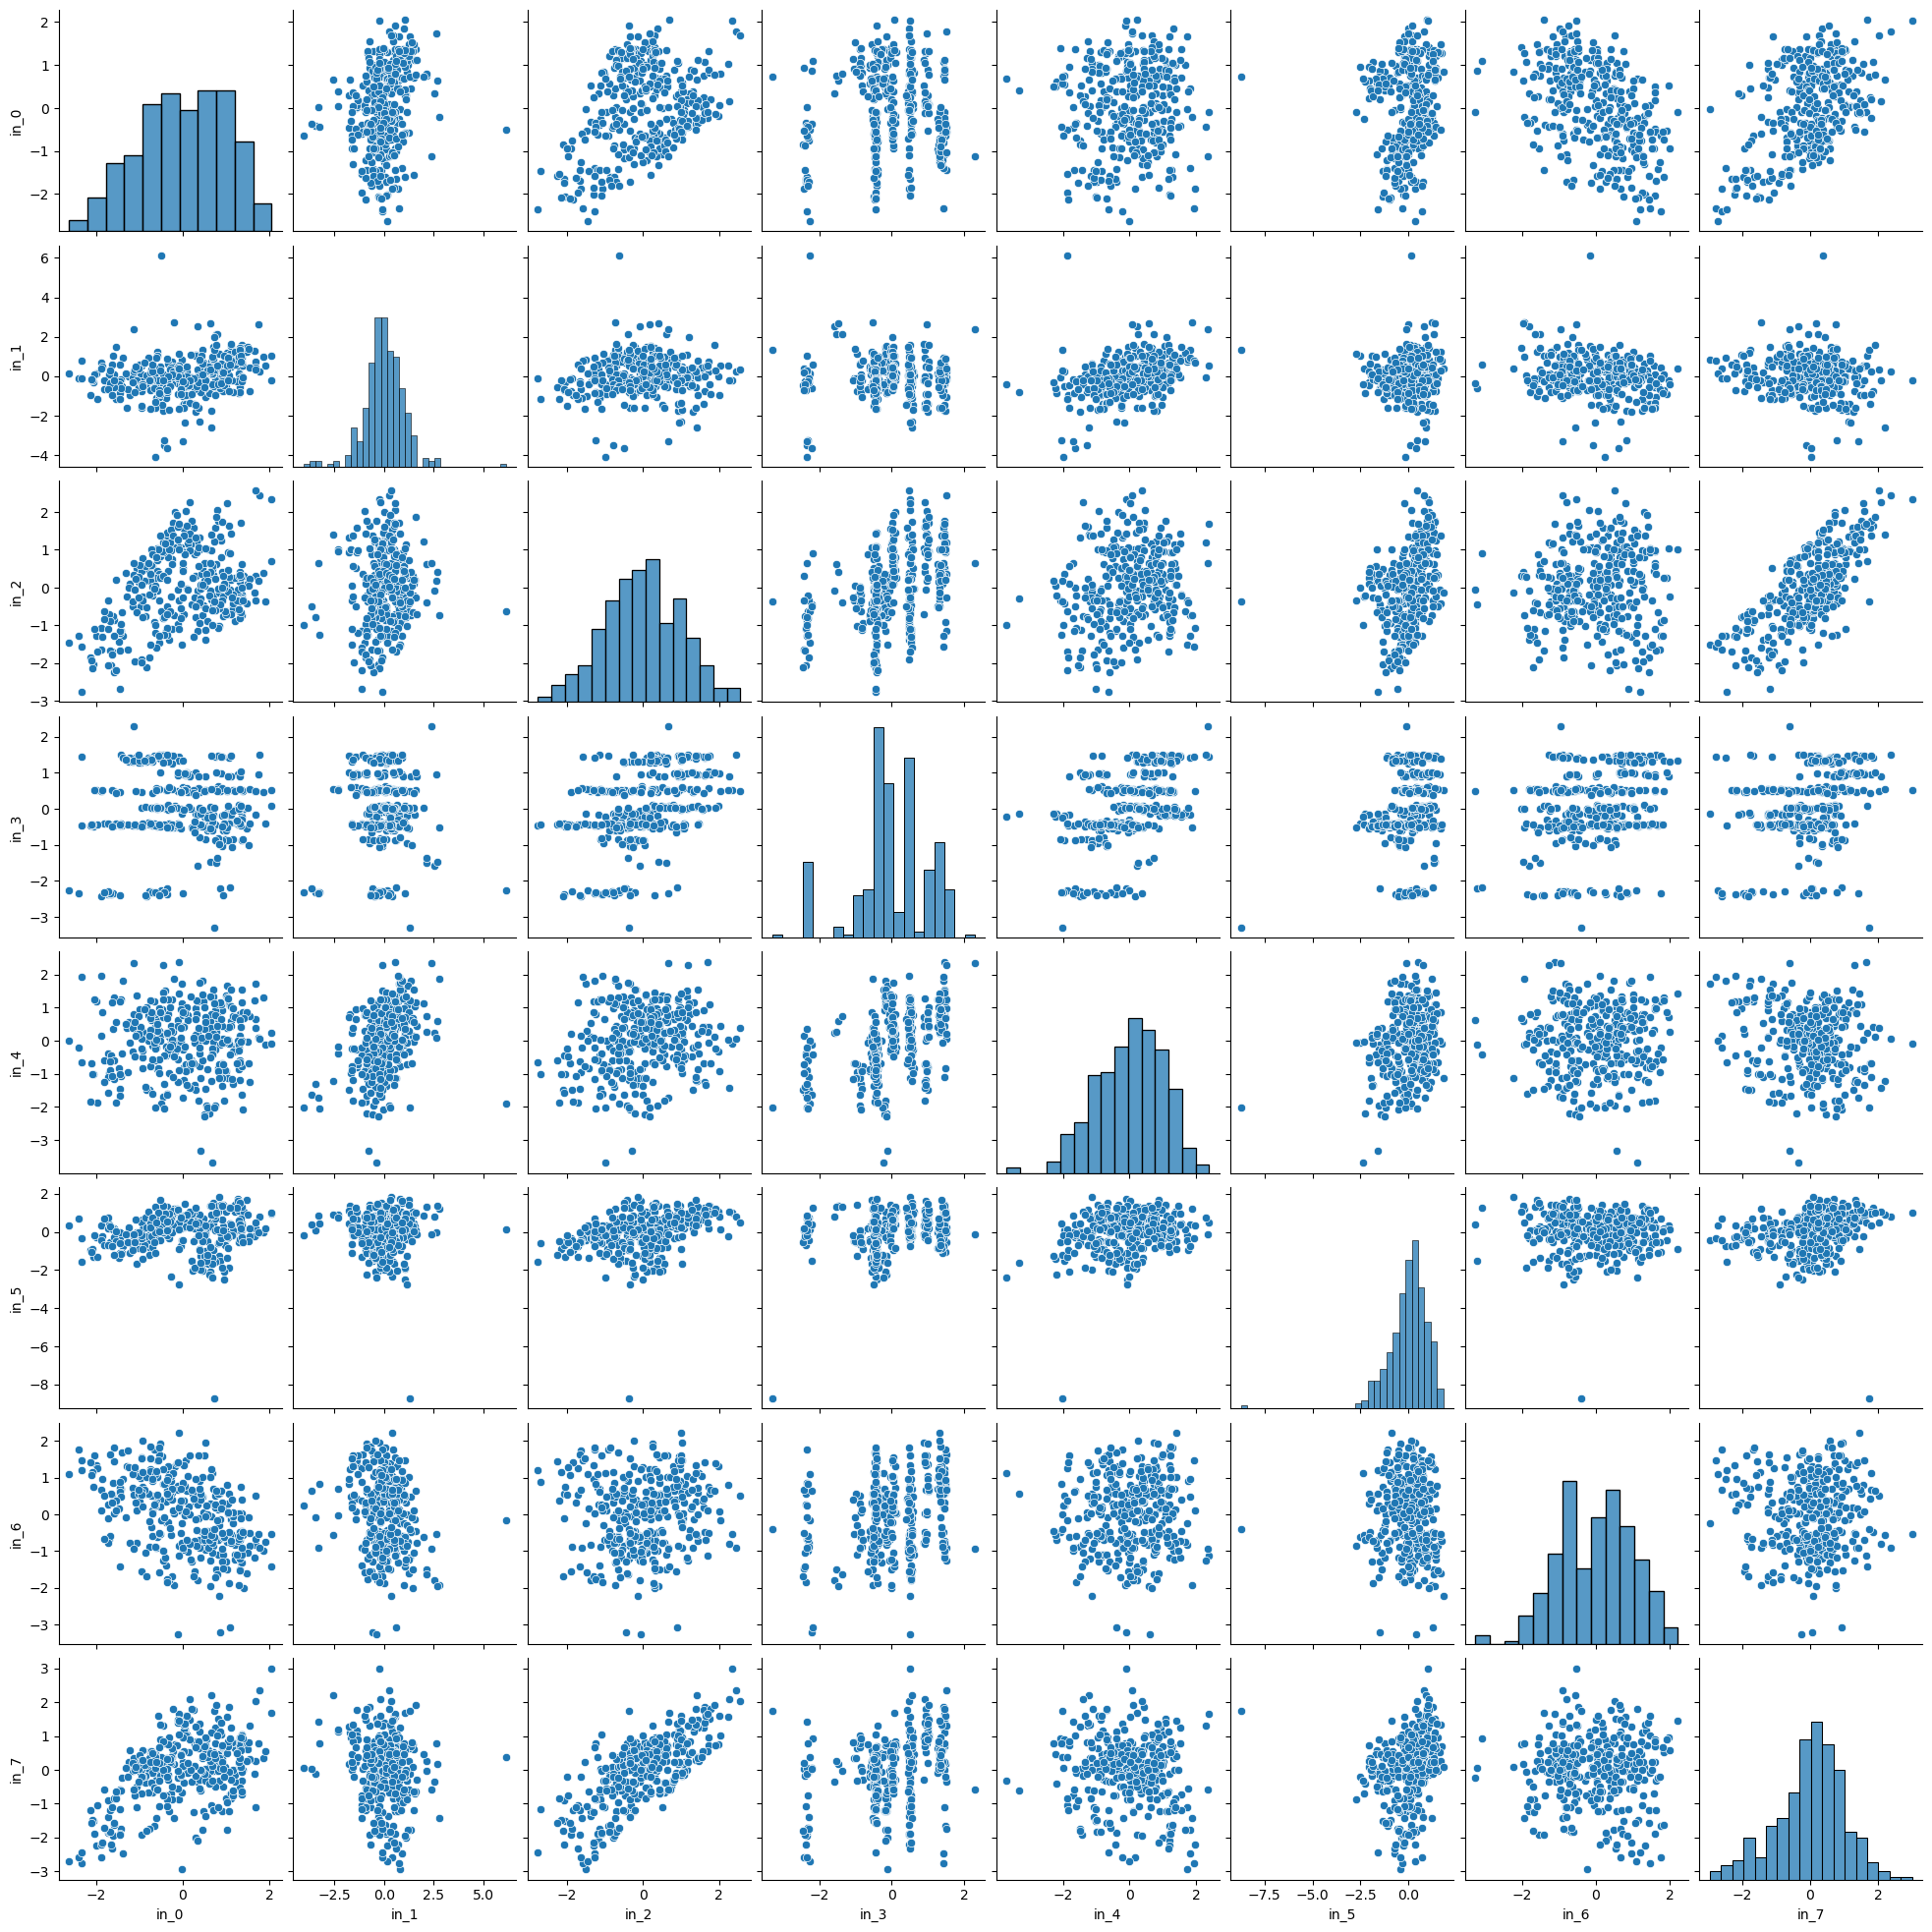

In [21]:
import seaborn as sns

# Assuming your DataFrame is named 'df'
sns.pairplot(data)


In [22]:
#univariate linear regressions

from sklearn.linear_model import LinearRegression
import numpy as np

for col1 in data.columns:
    for col2 in data.columns:
        # avoiding same columns
        if col1 == col2:
            continue
        
        # Extract the column data
        x = data[col1].values.reshape(-1, 1)
        y = data[col2].values.reshape(-1, 1)
        
        # Fit data to modeels
        model = LinearRegression()
        model.fit(x, y)
        slope = model.coef_[0][0]
        intercept = model.intercept_[0]
        
        # RMSE calculation
        y_pred = model.predict(x)
        MSE = np.square(np.subtract(y,y_pred)).mean() 
        RMSE = np.sqrt(MSE)  
        
        # Print the results
        print(f"Regression between {col1} and {col2}: Slope={slope}, Intercept={intercept}, RMSE = {RMSE}")


Regression between in_0 and in_1: Slope=0.23974412731700662, Intercept=7.28472113194748e-12, RMSE = 0.9708361104895247
Regression between in_0 and in_2: Slope=0.3797859964491284, Intercept=-7.975629128076642e-12, RMSE = 0.9250743737553015
Regression between in_0 and in_3: Slope=0.06493646956154857, Intercept=-6.1556935109498066e-12, RMSE = 0.9978894001449599
Regression between in_0 and in_4: Slope=0.040268889729378025, Intercept=-2.0463991501837414e-11, RMSE = 0.9991888792981094
Regression between in_0 and in_5: Slope=0.12044546917695169, Intercept=2.1939746954287173e-12, RMSE = 0.9927199448689022
Regression between in_0 and in_6: Slope=-0.46434268136789103, Intercept=-3.096334478011909e-12, RMSE = 0.8856556183067973
Regression between in_0 and in_7: Slope=0.5031018688622578, Intercept=-8.688414698961679e-12, RMSE = 0.8642271168784108
Regression between in_1 and in_0: Slope=0.23974412729808545, Intercept=3.701581674962714e-12, RMSE = 0.9708361104512142
Regression between in_1 and in_2:

In [171]:
#multivariate linear regression in2 = a in1 + b in3 +...+
#multicollinearity ??
#forwards selection to find relevant features
from sklearn.metrics import mean_squared_error


#X = data.drop(data.columns[2], axis=1) # remove target feature
X = data.iloc[:, [7,4,5,1]]  # 1 3 7 - 0.615; 3,4,7 - 0.60
y = data.iloc[:, 2]   # Target feature


# fit the model
model = LinearRegression()
model.fit(X, y)


# Calculate RMSE
y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("Coefficient values:", model.coef_)
print("Intercept:", model.intercept_)
print("RMSE:", rmse)

### confidence intervals and p-values for the coefficients

Coefficient values: [0.75887251 0.2096712  0.14777877 0.12472398]
Intercept: 1.339562208451489e-12
RMSE: 0.5773512723925931


In [168]:
#multivariate linear regression in2 = a in1 + b in3 +...+
#multicollinearity ??
#forwards selection to find relevant features
from sklearn.metrics import mean_squared_error


#X = data.drop(data.columns[2], axis=1) # remove target feature
X = data.iloc[:, [0,2,6,7,4,5,1]]  # 1 3 7 - 0.615; 3,4,7 - 0.60
y = data.iloc[:, 3]   # Target feature


# fit the model
model = LinearRegression()
model.fit(X, y)


# Calculate RMSE
y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("Coefficient values:", model.coef_)
print("Intercept:", model.intercept_)
print("RMSE:", rmse)

### confidence intervals and p-values for the coefficients

Coefficient values: [-0.05373512  0.02011295  0.20071906  0.39939128  0.59115741  0.01843392
 -0.09478702]
Intercept: 1.0843784034401442e-11
RMSE: 0.7176652522604183


# clustering - determining the number of  clusters


C:\Users\ns650\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


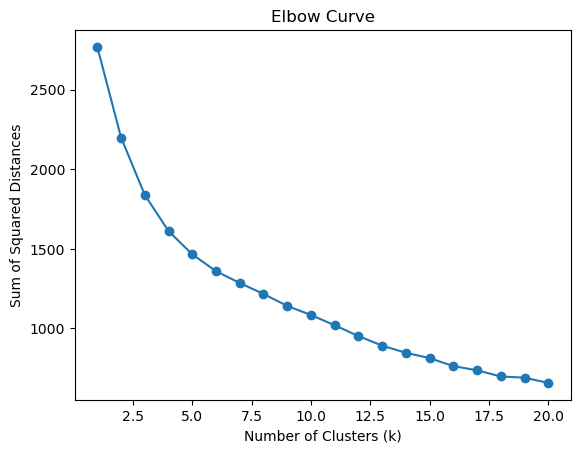

In [146]:
from sklearn.cluster import KMeans

X = data.values

# Initialize an empty list to store the inertia values
inertia = []

# Define the range of clusters to try
k_values = range(1, 21)

# Perform K-means clustering for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Curve')
plt.show()


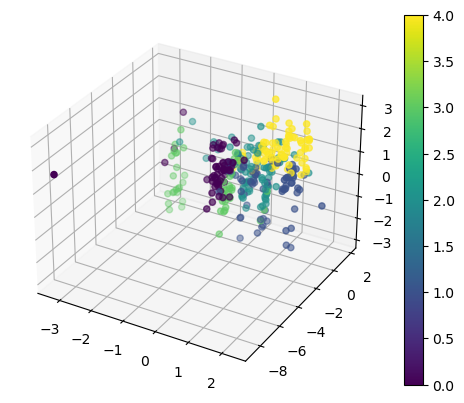

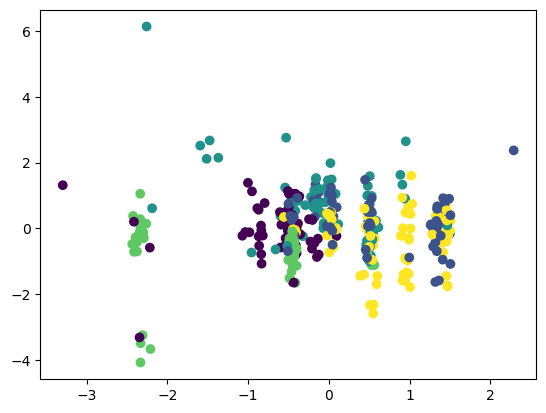

In [153]:
# 3D plots where the colouring is done based on the cluster value

k = 5 
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

labels = kmeans.labels_
X = data.values

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points and color them based on the cluster labels
scatter = ax.scatter(X[:, 3], X[:, 5], X[:, 7], c=labels, cmap='viridis')


plt.colorbar(scatter)
plt.show()

# make 2D plot

plt.scatter(X[:, 3], X[:, 1],c=labels)
plt.show()



# Data purification and analysis repeat

In [155]:
# REMOVING OUTLIERS HERE 

q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1
threshold = 1.5

# Calculate the lower and upper bounds
lower_bound = q1 - threshold * iqr
upper_bound = q3 + threshold * iqr

## remove outliers

outliers = ((data < lower_bound) | (data > upper_bound)).any(axis=1)
clean_data = data[~outliers]

In [157]:
###Exploratory analysis
means = clean_data.mean(axis=0)
median = clean_data.median()

#standard deviations
stds = clean_data.std(axis=0)


print("Means:")
print(means)
print("\nMedian:")
print(median)
print("\nStandard deviations:")
print(stds)

# rnagesss and interquartle range
##### summmarise - present in a tableeeeeeeee

Means:
in_0    0.081959
in_1    0.018808
in_2    0.095914
in_3    0.215605
in_4    0.104767
in_5    0.054867
in_6    0.072944
in_7    0.107098
dtype: float64

Median:
in_0    0.116202
in_1    0.008064
in_2    0.095620
in_3    0.035800
in_4    0.189538
in_5    0.138360
in_6    0.122381
in_7    0.209412
dtype: float64

Standard deviations:
in_0    0.956878
in_1    0.779563
in_2    0.968125
in_3    0.727424
in_4    0.910720
in_5    0.856294
in_6    0.952407
in_7    0.877855
dtype: float64


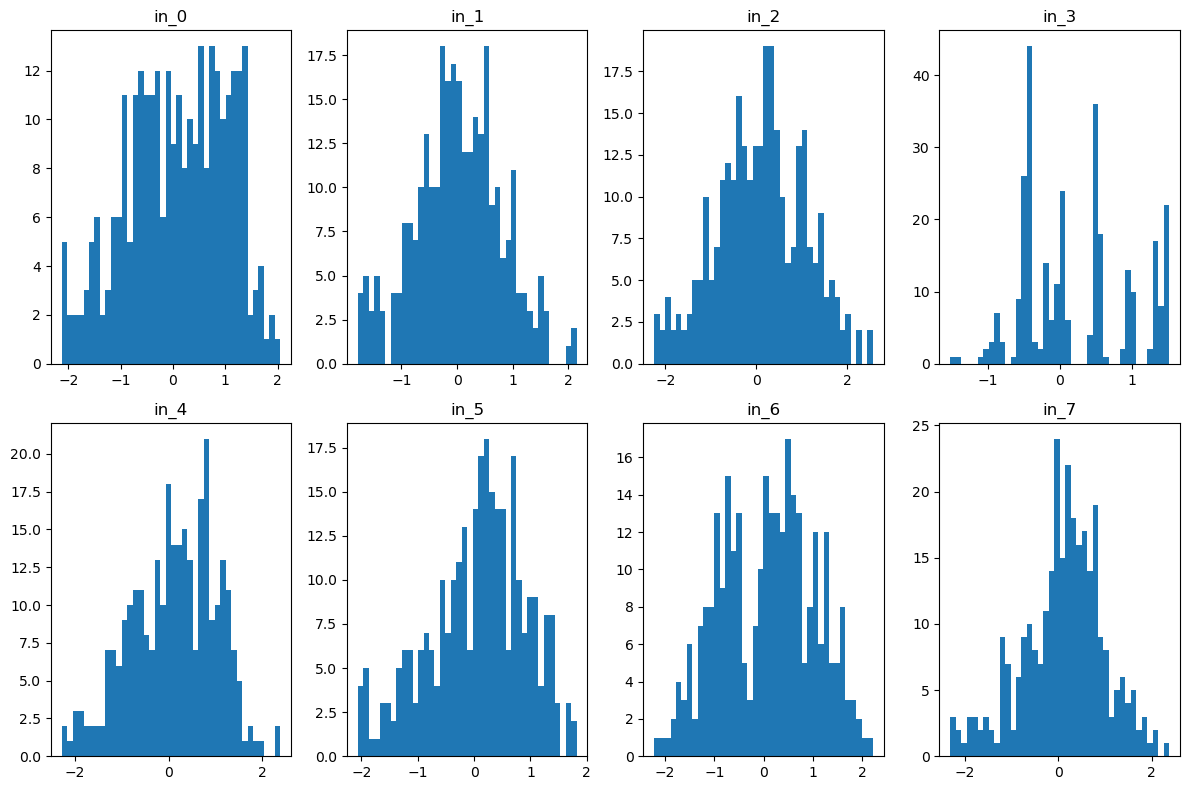

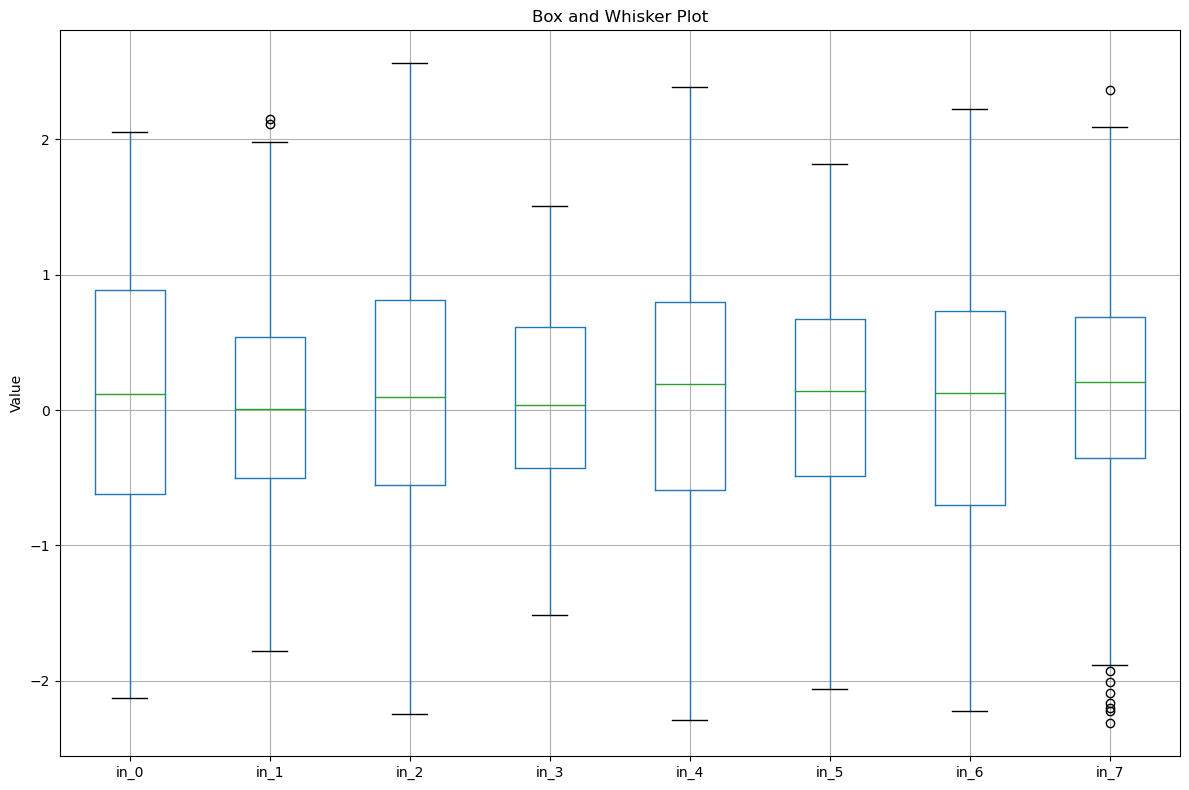

In [160]:
### Distributions
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 8))

axes = axes.flatten()

# Iterate over each column and plot a histogram
for i, col in enumerate(clean_data.columns):
    axes[i].hist(clean_data[col], bins=40)  
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

clean_data.boxplot(figsize=(12, 8))

# Set the title and y-axis label
plt.title('Box and Whisker Plot')
plt.ylabel('Value')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

#Calculate the lower whisker by finding the minimum value within the dataset that is not considered an outlier. This value is determined using the formula: Q1 - 1.5 * IQR. Any data point below this value is considered a lower outlier.

In [165]:
#check normality ?shapiro wilk
from scipy import stats
for col in clean_data.columns:
    shapiro_test = stats.shapiro(clean_data[col])
    shapiro_test
    shapiro_test.statistic

    print(shapiro_test.pvalue)

8.72211458045058e-05
0.3261251151561737
0.4965352714061737
4.340396098090338e-10
0.005269702989608049
0.00025799174909479916
0.0026101842522621155
0.002750103361904621


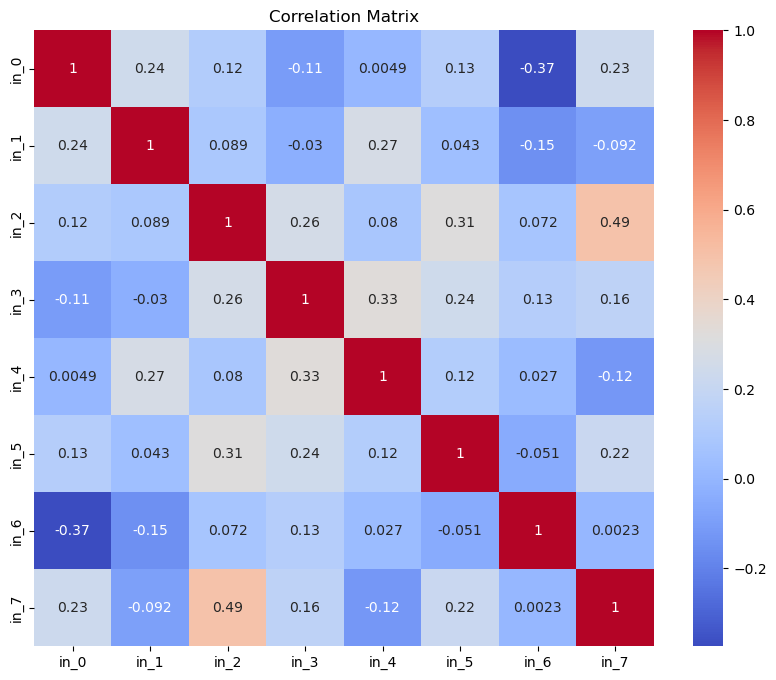

In [166]:
#Correlation matrix
import seaborn as sns

correlation_matrix = clean_data.corr(method='kendall')

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

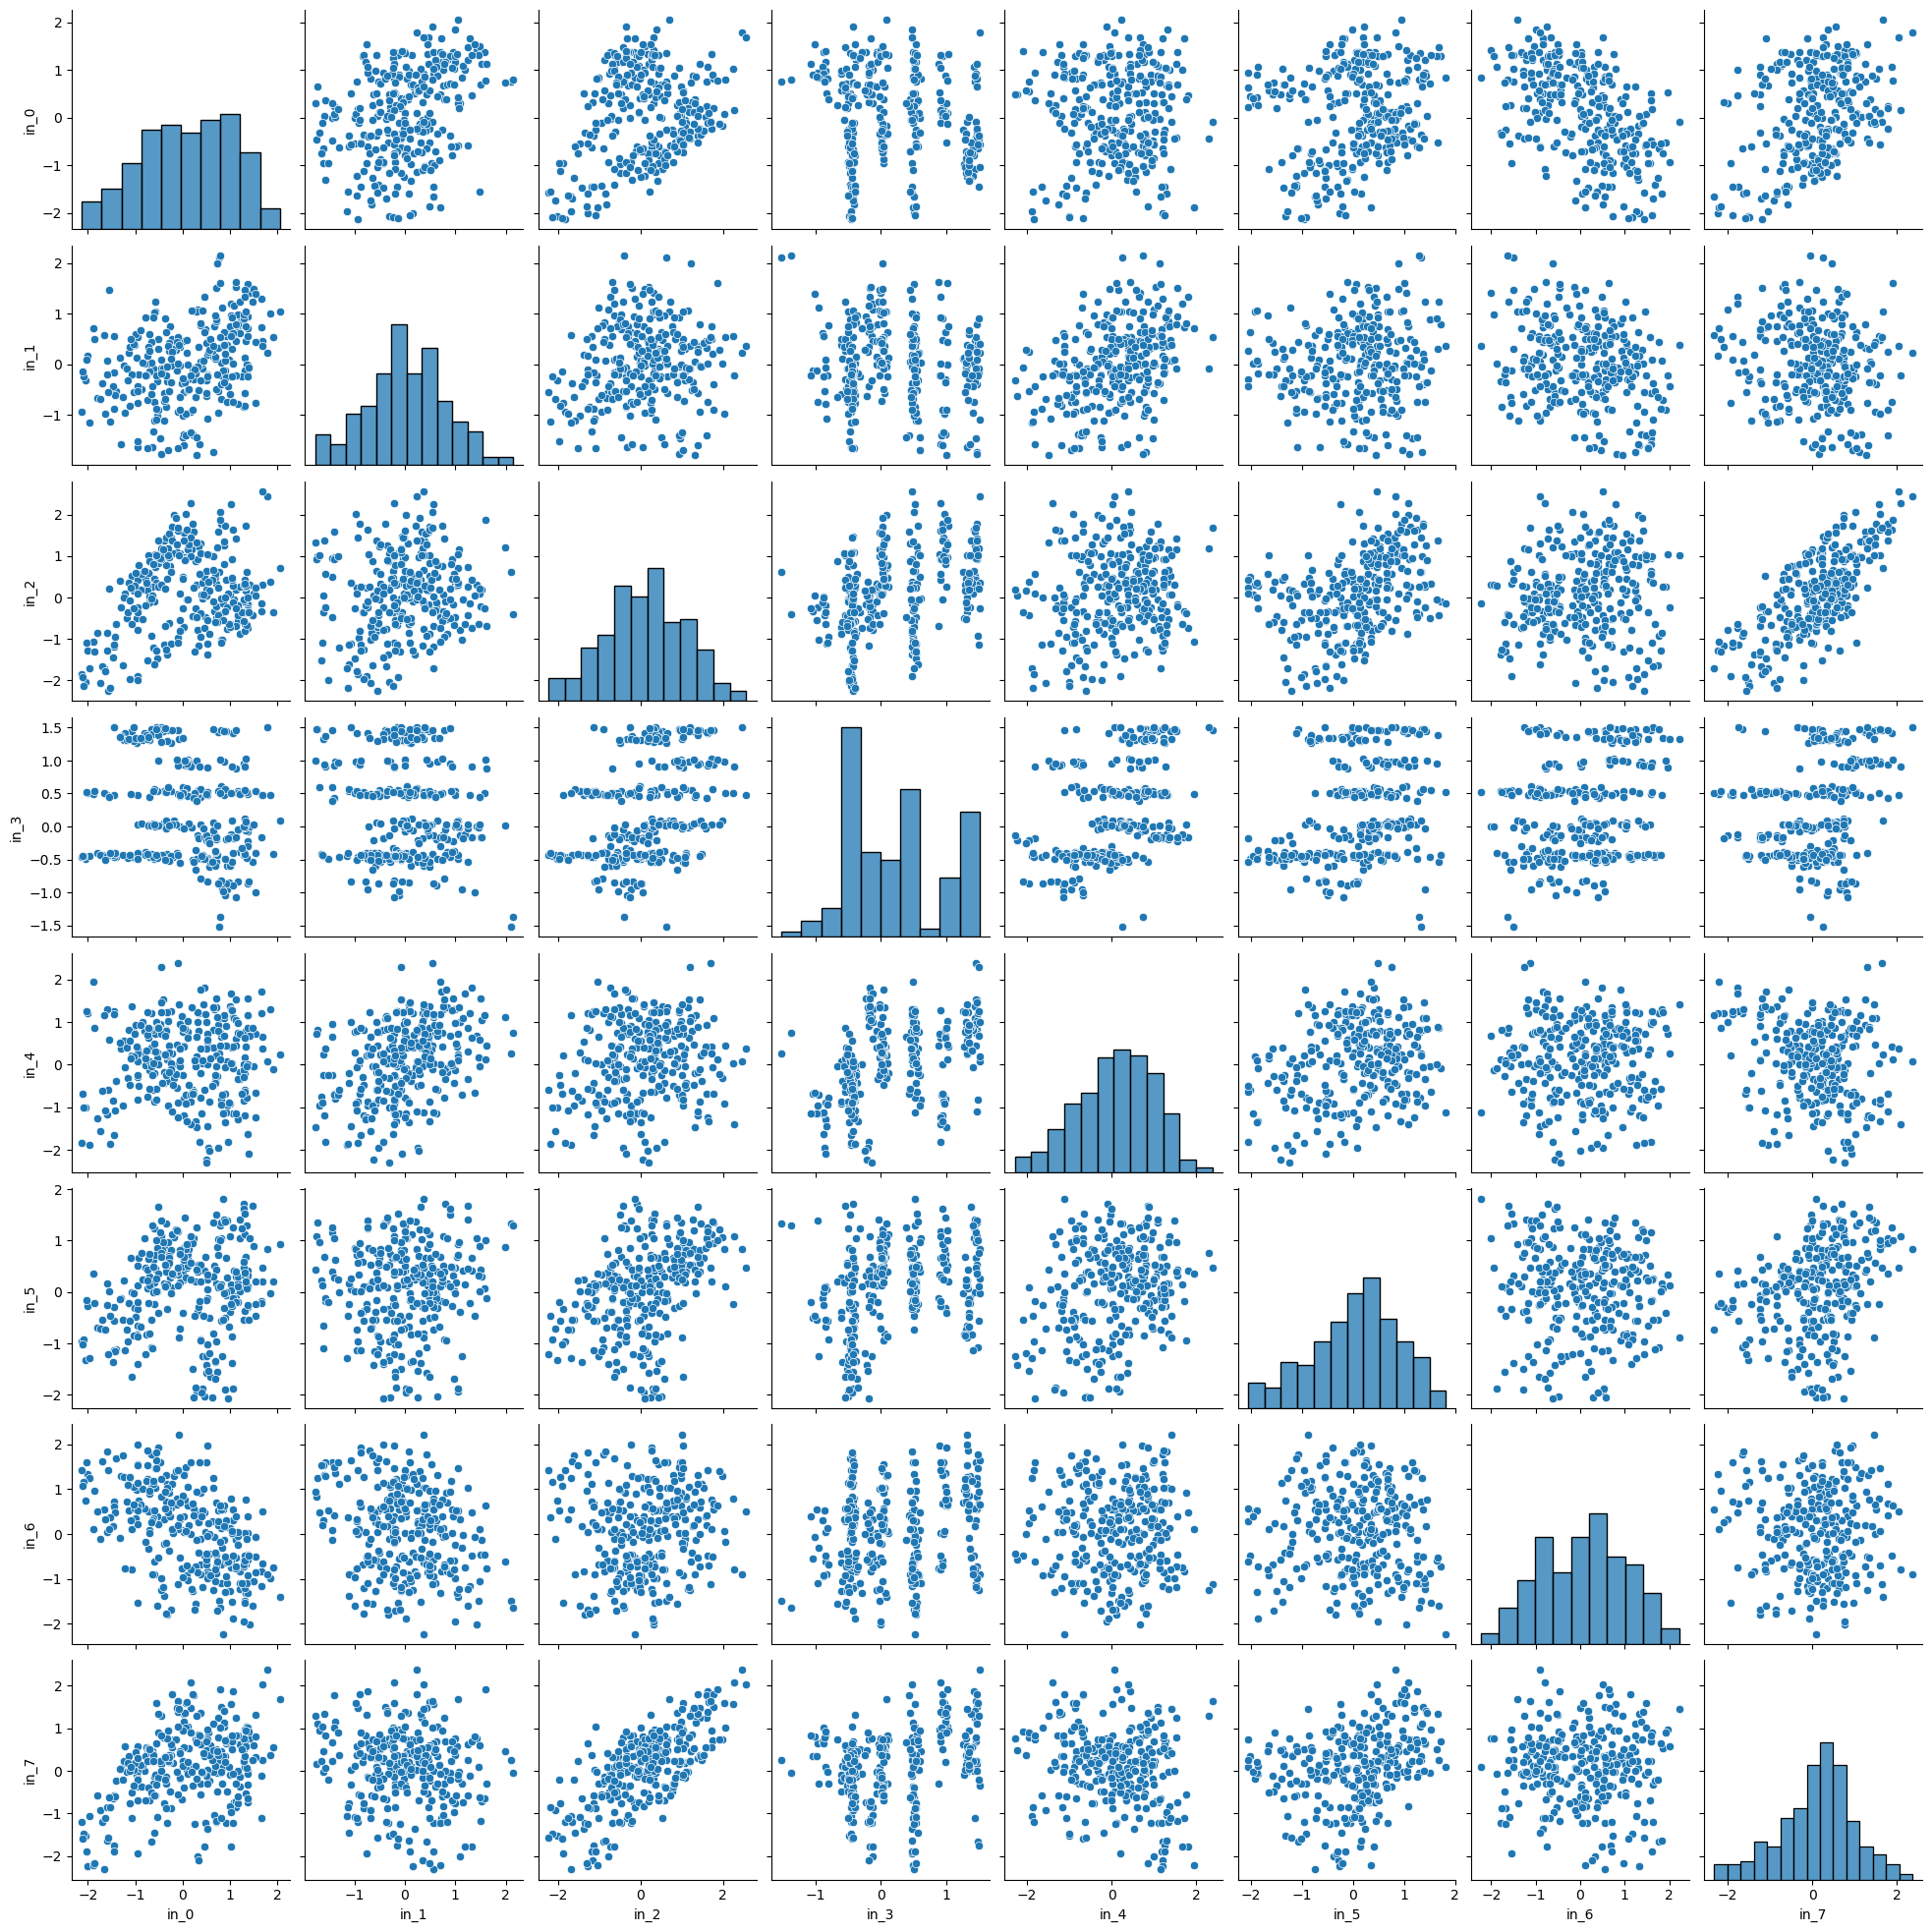

In [167]:
import seaborn as sns

# Assuming your DataFrame is named 'df'
sns.pairplot(clean_data)


In [173]:
#multivariate linear regression in2 = a in1 + b in3 +...+
#multicollinearity ??
#forwards selection to find relevant features
from sklearn.metrics import mean_squared_error


#X = data.drop(data.columns[2], axis=1) # remove target feature
X = clean_data.iloc[:, [7,4,5,1]]  # 1 3 7 - 0.615; 3,4,7 - 0.60
y = clean_data.iloc[:, 2]   # Target feature


# fit the model
model = LinearRegression()
model.fit(X, y)


# Calculate RMSE

y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("Coefficient values:", model.coef_)
print("Intercept:", model.intercept_)
print("RMSE:", rmse)

### confidence intervals and p-values for the coefficients

Coefficient values: [0.82308626 0.2240094  0.14652307 0.184761  ]
Intercept: -0.02721964825109542
RMSE: 0.5785461439828625


C:\Users\ns650\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


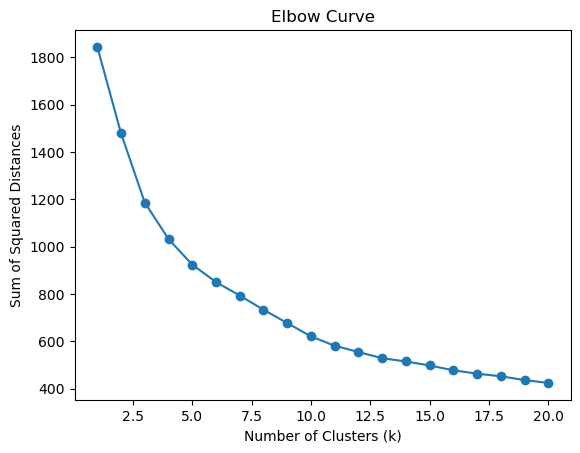

In [177]:
##########Clustering
from sklearn.cluster import KMeans

X = clean_data.values

# Initialize an empty list to store the inertia values
inertia = []

# Define the range of clusters to try
k_values = range(1, 21)

# Perform K-means clustering for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Curve')
plt.show()


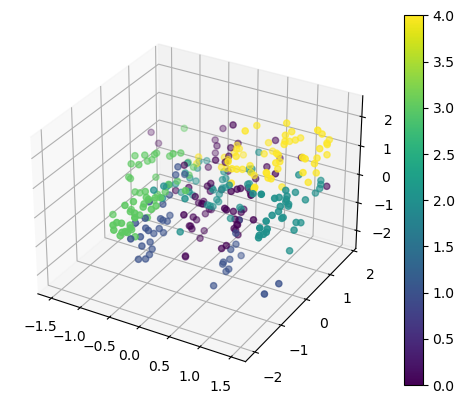

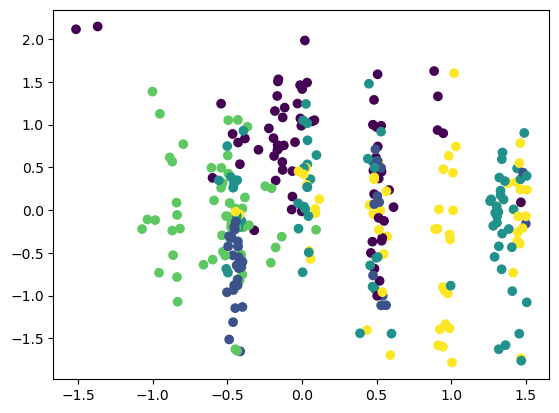

In [180]:
# 3D plots where the colouring is done based on the cluster value
X = clean_data.values
k = 5
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

labels = kmeans.labels_


# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points and color them based on the cluster labels
scatter = ax.scatter(X[:, 3], X[:, 5], X[:, 7], c=labels, cmap='viridis')


plt.colorbar(scatter)
plt.show()

# make 2D plot

plt.scatter(X[:, 3], X[:, 1],c=labels)
plt.show()

